<img src=https://www.ieseg.fr/wp-content/uploads/IESEG-Logo-2012-rgb.jpg width="500">


## IESEG School of Management

## Credit Scoring - Individual Assignment

#### Project Description
1) Apply survival analysis techniques learned in class

### Introduction:
### Survival Analysis: Survival analysis is a branch of statistics for analyzing the expected duration of time until one event occurs, such as death in biological organisms and failure in mechanical systems.


In Short it is used to predict time until event occurs. Some of the use cases can involve:
- Common business applications:
- Customer churn (customer lifetime value)
- Time until default
- Time of early repayment
- Time of next cash-flow
- Engineering: Time until machine failure
- Insurance: Time until claim

### 1) Prep the environement

In [26]:
#Set data files path
%cd "c:/Users/irana/OneDrive - IESEG/Documents/Courses/Semester_2/Credit_Scoring/ind_prj/Project/data"

c:\Users\irana\OneDrive - IESEG\Documents\Courses\Semester_2\Credit_Scoring\ind_prj\Project\data


#### Load libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


from collections import defaultdict

import lifelines

#### Read data

In [3]:
credit_surv  = pd.read_csv('mortgage.csv')

#### 2) Expore data

In [4]:
#Check the sample data and data dimentions
print(credit_surv.shape)

credit_surv.sample(5)

(622489, 23)


,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
239493,19311,17,13,16,133,152969.26,82.863216,7.000,179.45,4.126684,...,1,0,154000.0,648,100.0,7.000,149.70,0,0,0
289538,22762,24,19,21,139,298157.64,64.576294,5.913,223.75,3.121195,...,1,0,296250.0,641,75.0,1.000,191.42,0,0,0
463470,36877,23,12,15,73,54946.88,41.216866,5.625,221.91,2.987109,...,0,1,64650.0,724,74.3,5.625,144.84,0,0,0
555872,43863,21,19,21,140,220000.00,69.012382,5.000,208.86,3.346929,...,0,0,220000.0,695,75.3,5.000,191.42,0,0,0
487261,38187,36,24,26,184,285930.36,109.644242,5.779,151.48,-3.516568,...,0,1,255000.0,722,66.2,1.400,223.75,0,0,0


In [5]:
#Check for nulls
credit_surv.isna().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

In [6]:
#treat the null values by filling them with average
credit_surv = credit_surv.fillna(credit_surv.LTV_time.mean())

In [7]:
# convert episodic data to static
credit_static = credit_surv.groupby("id").agg(np.max).reset_index()

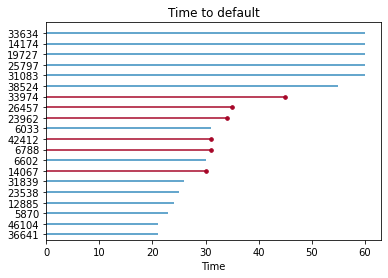

In [8]:
#Plot the sample default time
from lifelines.plotting import plot_lifetimes

df_samp = credit_static.sample(20)
ax = plot_lifetimes(df_samp["time"], event_observed=df_samp["default_time"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

##### From the plot above, it seems like the default time may lies between 30 - 50 time period, but this is just a pre-liminary analysis on a sample data, lets look at the analysis in detail in the next steps

---------------------

#### 3) Kaplan-Meier Method
- Evaluate whether the time to default for borrowers with low outstanding balance at origination time (30% quantile) significantly differs from borrowers with Average/High outstanding balance at origination time.
- Display and compare the probability of survival after 25 and 50 months for the two groups

## The Kaplan-Meier
##### The Kaplan-Meier estimator (also known as the product-limit estimator, you will see why later on) is a non-parametric technique of estimating and plotting the survival probability as a function of time. It is often the first step in carrying out the survival analysis, as it is the simplest approach and requires the least assumptions. To carry out the analysis using the Kaplan-Meier approach, we assume the following:

##### The event of interest is unambiguous and happens at a clearly specified time.
- The survival probability of all observations is the same, it does not matter exactly when they have entered the study.
- Censored observations have the same survival prospects as observations that continue to be followed.

##### In real-life cases, we never know the true survival function. That is why with the Kaplan-Meier estimator, we approximate the true survival function from the collected data. The estimator is defined as the fraction of observations who survived for a certain amount of time under the same circumstances and is given by the following formula:

![](https://miro.medium.com/max/433/1*TyTu1to3tNRpRbOadQ6O-g.png)

where:
- t_i is a time when at least one event happened,
- d_i is the number of events that happened at time t_i,
- n_i represents the number of individuals known to have survived up to time t_i (they have not yet had the death event or have been censored). Or to put it differently, the number of observations at risk at time t_i.

-------------

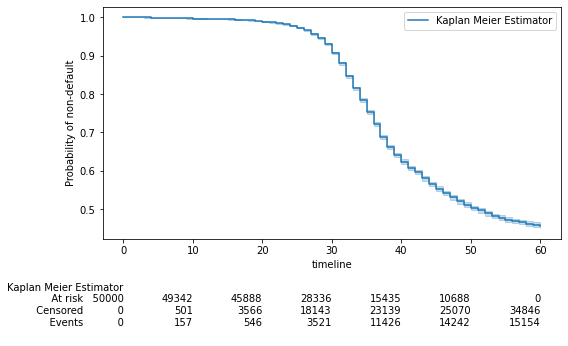

In [9]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
# fit on static data: TIME indicates the last observed timestep, TARGET indicates whether the customer defaulted
kmf.fit(credit_static['time'], credit_static['default_time'], label='Kaplan Meier Estimator')

# plot survival function
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.show()

#### The survival function gives us a nice sigmoid shape curve, so the commulitive probability seems to be normally distributed.
#### It may also be important to notice that the probability of default decreases with time. (Probability of default is inversly propotional to time left in loan)

35.0


C:\Users\irana\AppData\Local\Temp\ipykernel_20468\2095583429.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([median_default, median_default], [0,1], 'k-', c="red")


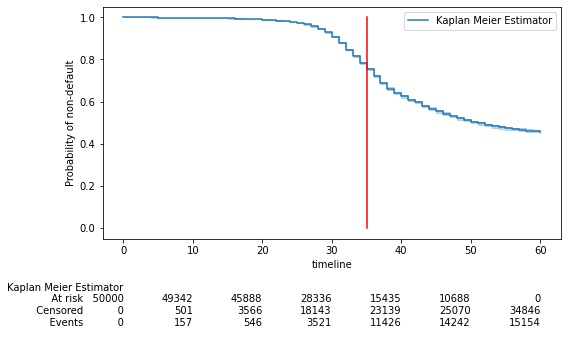

In [10]:
# Look at the Median default_time.
median_default = credit_static.query("default_time==1")["time"].median()
print(median_default)

# add to plot
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(8,5))
ax.set_ylabel('Probability of non-default')
plt.plot([median_default, median_default], [0,1], 'k-', c="red")
plt.show()

In [11]:
#look at the sample event data
kmf.event_table.head(3)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,50000,50000
1.0,22,3,19,0,50000
2.0,37,5,32,0,49978


<AxesSubplot:xlabel='timeline'>

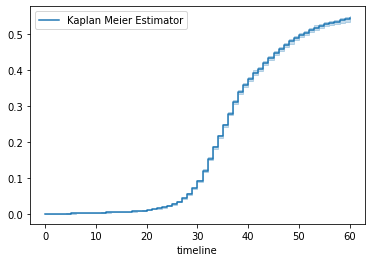

In [12]:
# plot cumulative hazard function
kmf.plot_cumulative_density()

#### 4) Probability of default with low/average-high balance

#### Predicting probability of default with for the borrowers with low outstanding balance

In [13]:
# "predict" probability to default at time 60
# 1 - probability of non-default at time 60
1 - kmf.predict(60)

0.5426757581616439

In [14]:
# Checking the 30th Quantile of Balance at Origin Time

credit_static['balance_orig_time'].quantile(0.3)
credit_static['low_balance'] = 1
credit_static.loc[(credit_static['balance_orig_time'] > credit_static['balance_orig_time'].quantile(0.3)),'low_balance'] = 0

<AxesSubplot:ylabel='low_balance'>

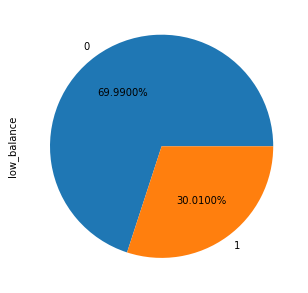

In [15]:
# display pie chart for low balance vs hig hbalance
credit_static["low_balance"].value_counts().plot.pie(autopct='%.4f%%', figsize=(5,8))

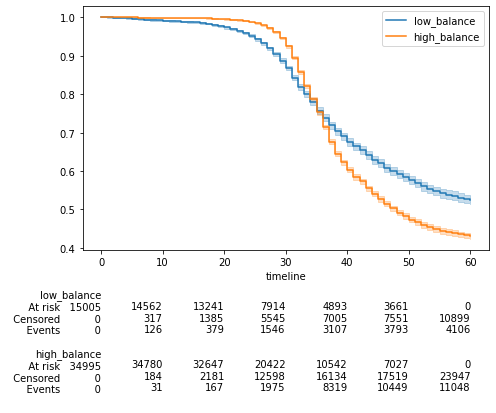

In [16]:
# Compare two groups

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(1,1 , figsize=(7,6))

# subset data
df1 = credit_static.loc[credit_static["low_balance"] == 1,:]
df2 = credit_static.loc[credit_static["low_balance"] == 0,:]

# fit subset low balance
ax = kmf1.fit(df1['time'], df1['default_time'], label='low_balance').plot_survival_function(ax=ax)

# fit subset high/normal balance
ax = kmf2.fit(df2['time'], df2['default_time'], label='high_balance').plot_survival_function(ax=ax)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf1, kmf2, ax=ax)
plt.tight_layout()

### Logrank test : The logrank test, or log-rank test, is a hypothesis test to compare the survival distributions of two samples. It is a nonparametric test and appropriate to use when the data are right skewed and censored (technically, the censoring must be non-informative)

In [17]:
# Perform logrank test to assess whether there is a difference between low balance and high balance in time to default

from lifelines.statistics import logrank_test

# Null-Hypothesis: No difference between the two groups
res = logrank_test(df1['time'], df2['time'], event_observed_A=df1['low_balance'],event_observed_B=df2['low_balance'])

#Look at the summary/p-value
res.summary 

,test_statistic,p,-log2(p)
0,37151.577469,0.0,inf


### From above since p < 0.05, We can reject the Null-Hypothesis and accept the alternate hypothesis that there is a difference in time to default between people with low and high balance

------------

In [18]:
credit_static.head(2)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,low_balance
0,1,48,-7,25,113,41303.42,28.963629,9.20,226.29,3.029499,...,0,45000.0,715,69.4,9.20,87.03,1,0,1,1
1,2,26,18,25,138,105826.38,65.469851,7.68,226.29,2.899137,...,0,107200.0,558,80.0,7.68,186.91,0,1,2,1


### 5) Cox Proportional Hazard model

#### Fit a Cox Proportional Hazard model (time varying) using the variables:
- ["default_time", "hpi_time", "gdp_time", "uer_time", "balance_time","interest_rate_time", "FICO_orig_time", "LTV_time"]
- Interpret the results by specifically explaining the impact of variables regarding the general economy on the probability of default


#### Proportional hazards model: The proportional hazards condition states that covariates are multiplicatively related to the hazard. In the simplest case of stationary coefficients, for example, a treatment with a drug may, say, halve a subject's hazard at any given time , while the baseline hazard may vary.

In [19]:
# select time varying variables

credit_tv = pd.merge(credit_surv[["id", "default_time", "hpi_time", "gdp_time", "uer_time", "balance_time","interest_rate_time", "FICO_orig_time", "LTV_time"]], credit_static[["id", "time"]]/
.rename(columns={"time":"time_end"}), on="id", how="inner")

# Assumption: time always starts at 0 (no interval censored data)
credit_tv["first_time"] = 0

In [20]:
from lifelines import CoxTimeVaryingFitter

# Note: credit_tv contains both time varying and static variables 
ctv = CoxTimeVaryingFitter()
ctv.fit(credit_tv, id_col="id", event_col="default_time", start_col="first_time", stop_col="time_end", show_progress=True)
ctv.summary

Iteration 9: norm_delta = 0.00000, step_size = 1.00000, ll = -193534.92545, newton_decrement = 0.00000, seconds_since_start = 75.1Convergence completed after 9 iterations.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
hpi_time,-7.725162e-03,0.992305,6.879571e-04,-9.073533e-03,-6.376790e-03,0.990968,0.993643,0.0,-11.229132,2.933454e-29,94.783315
gdp_time,-7.856911e-02,0.924438,4.221101e-03,-8.684232e-02,-7.029591e-02,0.916822,0.932118,0.0,-18.613415,2.501528e-77,254.465654
uer_time,-1.620742e-01,0.850378,8.073371e-03,-1.778977e-01,-1.462507e-01,0.837028,0.863941,0.0,-20.075157,1.216970e-89,295.368307
balance_time,5.797382e-07,1.000001,2.128008e-08,5.380300e-07,6.214464e-07,1.000001,1.000001,0.0,27.243240,1.998460e-163,540.475391
interest_rate_time,1.713197e-01,1.186870,3.451141e-03,1.645556e-01,1.780838e-01,1.178869,1.194925,0.0,49.641471,0.000000e+00,inf
FICO_orig_time,-4.456852e-03,0.995553,1.211527e-04,-4.694307e-03,-4.219397e-03,0.995317,0.995789,0.0,-36.787051,2.974133e-296,981.718247
LTV_time,8.251092e-03,1.008285,1.350111e-04,7.986475e-03,8.515709e-03,1.008018,1.008552,0.0,61.114162,0.000000e+00,inf


In [21]:
# inspect p-values
round(ctv.summary['p'], 4)

covariate
hpi_time              0.0
gdp_time              0.0
uer_time              0.0
balance_time          0.0
interest_rate_time    0.0
FICO_orig_time        0.0
LTV_time              0.0
Name: p, dtype: float64

<AxesSubplot:xlabel='log(HR) (95% CI)'>

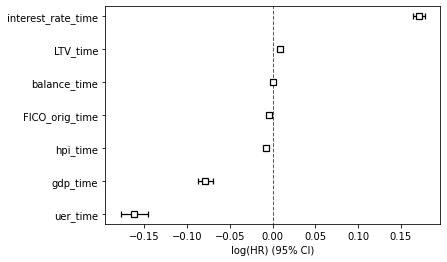

In [22]:
ctv.plot()

#### From the plot above, we notice that unemployment , gdp and intrest rate are the main factors which can have an impact on the probability of default.
#### On ther other hand, balance at time has almost 0 impact, LTV has a slightly +ve impact and FICO score and house price index have slightlt -ve impact on the probability of default

In [23]:
# print parameter values
print(round(ctv.params_, 6))

# Interpretation (under ceteris paribus assumption): 
print('/n The increase in intrest rates increases the probability of default by  {:.3f}%'.format((np.exp(0.171320) - 1)*100))

print('\n The decrease nunemployment rate decreased the probability of default by  {:.3f}%'.format((np.exp(-0.162074) - 1)*100))

print('\n The decrease in GDP rate increases the probability of default by a factor of {:.3f}%'.format((np.exp(-0.078569) - 1)*100))

covariate
hpi_time             -0.007725
gdp_time             -0.078569
uer_time             -0.162074
balance_time          0.000001
interest_rate_time    0.171320
FICO_orig_time       -0.004457
LTV_time              0.008251
dtype: float64

 The increase in intrest rates increases the probability of default by  18.687%

 The decrease nunemployment rate decreased the probability of default by  -14.962%

 The decrease in GDP rate increases the probability of default by a factor of -7.556%


In [24]:
ctv_df = pd.DataFrame(round(ctv.params_, 6))
ctv_df[ctv_df.index=='balance_time'][0]

covariate
balance_time    0.000001
Name: 0, dtype: float64

<AxesSubplot:>

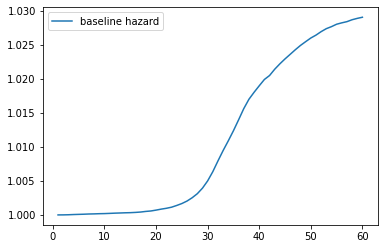

In [25]:
np.exp(ctv.baseline_cumulative_hazard_).plot()

---------------------